In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#Importing necessary modules

import time
import datetime as dt
from datetime import datetime
from matplotlib.pyplot import cm 
from matplotlib import dates

import dateutil.parser
from operator import itemgetter
from functools import reduce
from itertools import groupby
from statistics import *
import math
import numpy as np
import csv

#from pyspark.mllib.fpm import FPGrowth,PrefixSpan,PrefixSpanModel

In [3]:
# RNA Tot (TGACCA)
# 0 844030.0
# 1 877669.0
# 2 824639.0

# RPF Tot (GCCAAT)
# 0 389363.0
# 1 422856.0
# 2 491833.0

# RNA Crude (ACAGTG)
# 0 723813.0
# 1 667911.0
# 2 655184.0

# RPF Crude (CAGATC)
# 0 870365.0
# 1 519750.0
# 2 818802.0



In [3]:
raw_data = {'sample':['RNATot', 'RPFTot', 'RNACru', 'RPFCru'],'0':[844030, 389363, 723813, 870365], '1':[877669, 422856, 667911, 519750], '2':[824639, 491833,655184,818802]}

df = pd.DataFrame(raw_data, columns = ['sample','0', '1', '2'])


In [4]:
df

,sample,0,1,2
0,RNATot,844030,877669,824639
1,RPFTot,389363,422856,491833
2,RNACru,723813,667911,655184
3,RPFCru,870365,519750,818802


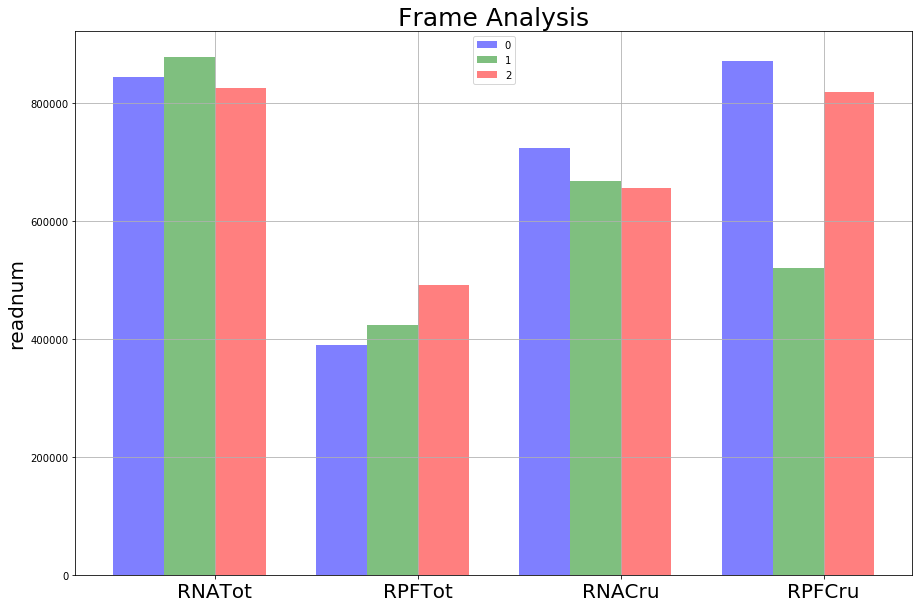

In [5]:
#setting the positions and width for the bars
pos = list(range(len(df['1'])))
width = 0.25

#plotting the bars
fig, ax = plt.subplots(figsize=(15,10))

#create a bar with pre_score data,
#in position pos,
plt.bar(pos,
       #using df['1'] data,
       df['0'],
       width,
       alpha = 0.5,
       color = 'b',
       label = df['sample'][0])

plt.bar([p + width for p in pos],
       df['1'],
       width,
       alpha =0.5,
       color = 'g',
       label = df['sample'][1])

plt.bar([p+width*2 for p in pos],
       df['2'],
       width,
       alpha = 0.5,
       color = 'r',
       label = df['sample'][2])

ax.set_ylabel('readnum', fontsize = 20)

ax.set_title('Frame Analysis', fontsize= 25)

ax.set_xticks([p+1.5*width for p in pos])

ax.set_xticklabels(df['sample'], fontsize = 20)


plt.legend(['0', '1', '2'], loc= 'upper center')

plt.grid()
plt.show()

In [24]:
pos

[0, 1, 2, 3]

In [2]:
rna_all_10 = [73.53, 56.45, 38.83, 23.99, 13.91]
rna_mito_10 = [79.27, 59.83, 38.68, 21.47, 10.04]

rpf_all_10 = [58.83, 39.02, 22, 10.25, 3.98]
rpf_mito_10 = [70.26, 49.01, 28.52, 12.67, 5.40]

te_all_10 = [32.45, 18.82, 10.03, 4.86, 2.02]
te_mito_10 = [35.02, 18.69, 9.23, 4.17, 1.35]

a = {'rna_all':rna_all_10, 'rna_mito':rna_mito_10, 'rpf_all':rpf_all_10}

b = pd.DataFrame(a)
b

,rna_all,rna_mito,rpf_all
0,73.53,79.27,58.83
1,56.45,59.83,39.02
2,38.83,38.68,22.00
3,23.99,21.47,10.25
4,13.91,10.04,3.98


In [3]:
def plot_count(country, country_count):

    sns.set_style("white")
    sns.set_style("ticks")

    '''
    configuration for font size
    '''
    MEDIUM_SIZE = 15
    BIGGER_SIZE = 25

    '''
    build a rectangle in axes coords
    '''
    left, width = .25, .5
    bottom, height = .25, .70
    right = left + width
    top = bottom + height

    plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    '''
    configuration for plot, x-axis, y-axis, which includes: size, label, range of axis values 
    '''
    x = list(range(0,17))
    plt.xticks(np.arange(min(x), max(x) + 1, 4.0))
    # plt.yticks(np.arange(min(count), max(count), 45000))
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 55
    fig_size[1] = 20
    plt.rcParams["figure.figsize"] = fig_size
    plt.xlabel(country, fontsize=30, color='green')
    plt.ylabel("% of Tourist", fontsize=30, color='red')
    
    ax = plt.gca()
    # ax.text(0.5*(left+right), top, 'No of Unique IMSIs',horizontalalignment='center', verticalalignment='center', fontsize=45, color='blue'
    #       , transform=ax.transAxes)
    '''
    plot each subzone in the same plot
    '''
    #y = [()] * len(country_count)
    num_plots = len(country_count)
    color = iter(cm.rainbow(np.linspace(0, 1, num_plots)))
    xticks = np.array(list(range(len(country_count[0])-3)))
   # plt.xticks(xticks, column_time[1:-2])
    #ax.set_xticks(xticks+width/2)

    width = 0.15
    for i in range(0, len(country_count)-2):
        submtz_i = country_count[i]
        col = next(color)
        
        plt.plot(xticks, submtz_i[1:-2], label="Submtz: " + str(submtz_i[0]), marker='o', c=col)
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.4, box.height*0.5])

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=6, fancybox=True, shadow=True, prop={'size':17})
    
    ax.grid(b=True, which='major', color='b', linewidth=0.13)
    ax.grid(b=True, which='minor', color='r', linewidth=0.13)
    ax.minorticks_on()
    plt.show()  # display the plot
    # fig, ax = plt.subplots()

In [4]:
a = [0,0.4,0.8,1.2,1.6]

sns.set_style("white")
sns.set_style("ticks")

'''
configuration for font size
'''
MEDIUM_SIZE = 30
BIGGER_SIZE = 30

'''
build a rectangle in axes coords
'''
left, width = .25, .5
bottom, height = .25, .70
right = left + width
top = bottom + height

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

'''
configuration for plot, x-axis, y-axis, which includes: size, label, range of axis values 
'''

plt.xticks(np.arange(min(a), max(a) + 1, 0.4))
# plt.yticks(np.arange(min(count), max(count), 45000))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('Threshold', fontsize=30, color='green')
plt.ylabel("% of Enriched", fontsize=30, color='red')



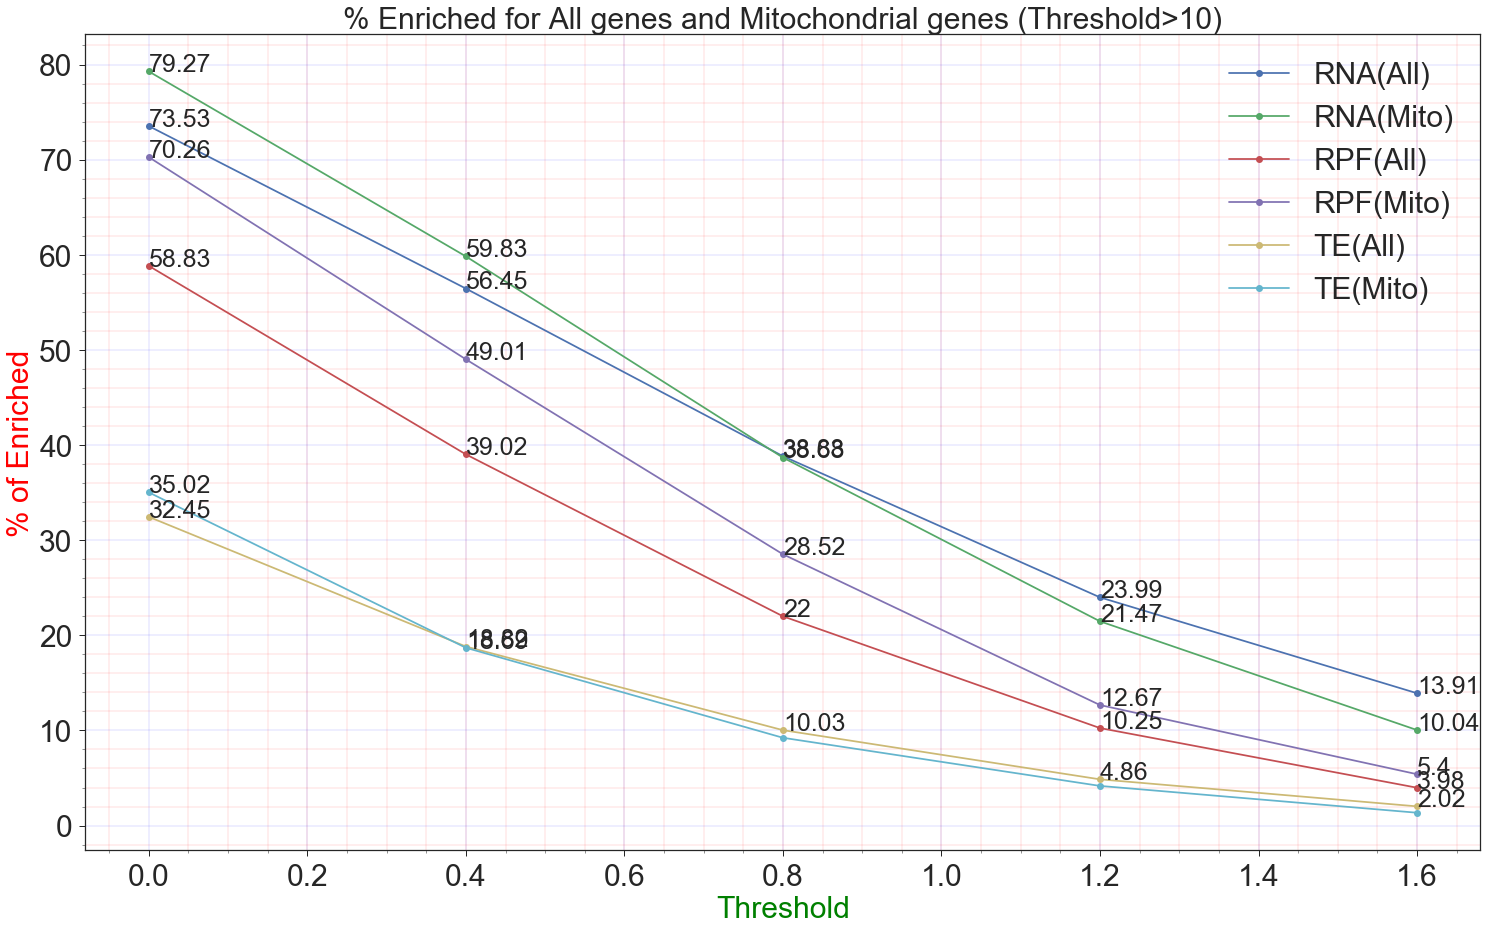

In [6]:
plt.xlabel('Threshold', fontsize=30, color='green')
plt.ylabel("% of Enriched", fontsize=30, color='red')

plt.plot(a, rna_all_10, label = 'RNA(All)', marker ='o')
for m,n in zip(a, rna_all_10): 
    plt.text(m, n, str(n), size = 25)
    
plt.plot(a, rna_mito_10, label = 'RNA(Mito)', marker = 'o')
for m,n in zip(a, rna_mito_10): 
    plt.text(m, n, str(n), size = 25)
    
plt.plot(a, rpf_all_10, label = 'RPF(All)',marker = 'o')
for m,n in zip(a, rpf_all_10): 
    plt.text(m, n, str(n), size = 25)
    
plt.plot(a, rpf_mito_10, label = 'RPF(Mito)',marker = 'o')
for m,n in zip(a, rpf_mito_10): 
    plt.text(m, n, str(n), size = 25)
    
plt.plot(a, te_all_10, label = 'TE(All)',marker = 'o')
for m,n in zip(a, te_all_10): 
    plt.text(m, n, str(n), size = 25)
    
plt.plot(a, te_mito_10, label = 'TE(Mito)',marker = 'o')
for m,n in zip(a[:2], te_mito_10[:2]): 
    plt.text(m, n, str(n), size = 25)

ax = plt.gca()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
#           ncol=6, fancybox=True, shadow=True, prop={'size':20})

plt.legend(loc = 'upper right', prop ={'size':30})
ax.grid(b=True, which='major', color='b', linewidth=0.13)
ax.grid(b=True, which='minor', color='r', linewidth=0.13)
ax.minorticks_on()
plt.title('% Enriched for All genes and Mitochondrial genes (Threshold>10)')


plt.show()

In [7]:
rna_all_20 = [75.68, 58.27, 39.83, 24.11, 13.74]
rna_mito_20 = [81.46, 62.22, 40.09, 22.25, 10.31]

rpf_all_20 = [58.99, 38.12, 20.35, 9.02, 3.03]
rpf_mito_20 = [70.44, 48.54, 27.25, 11.31, 4.50]

te_all_20 = [28.84, 15.57, 7.48, 2.90, 0.91]
te_mito_20 = [32.57, 15.81, 7.30, 2.57, 0.27]



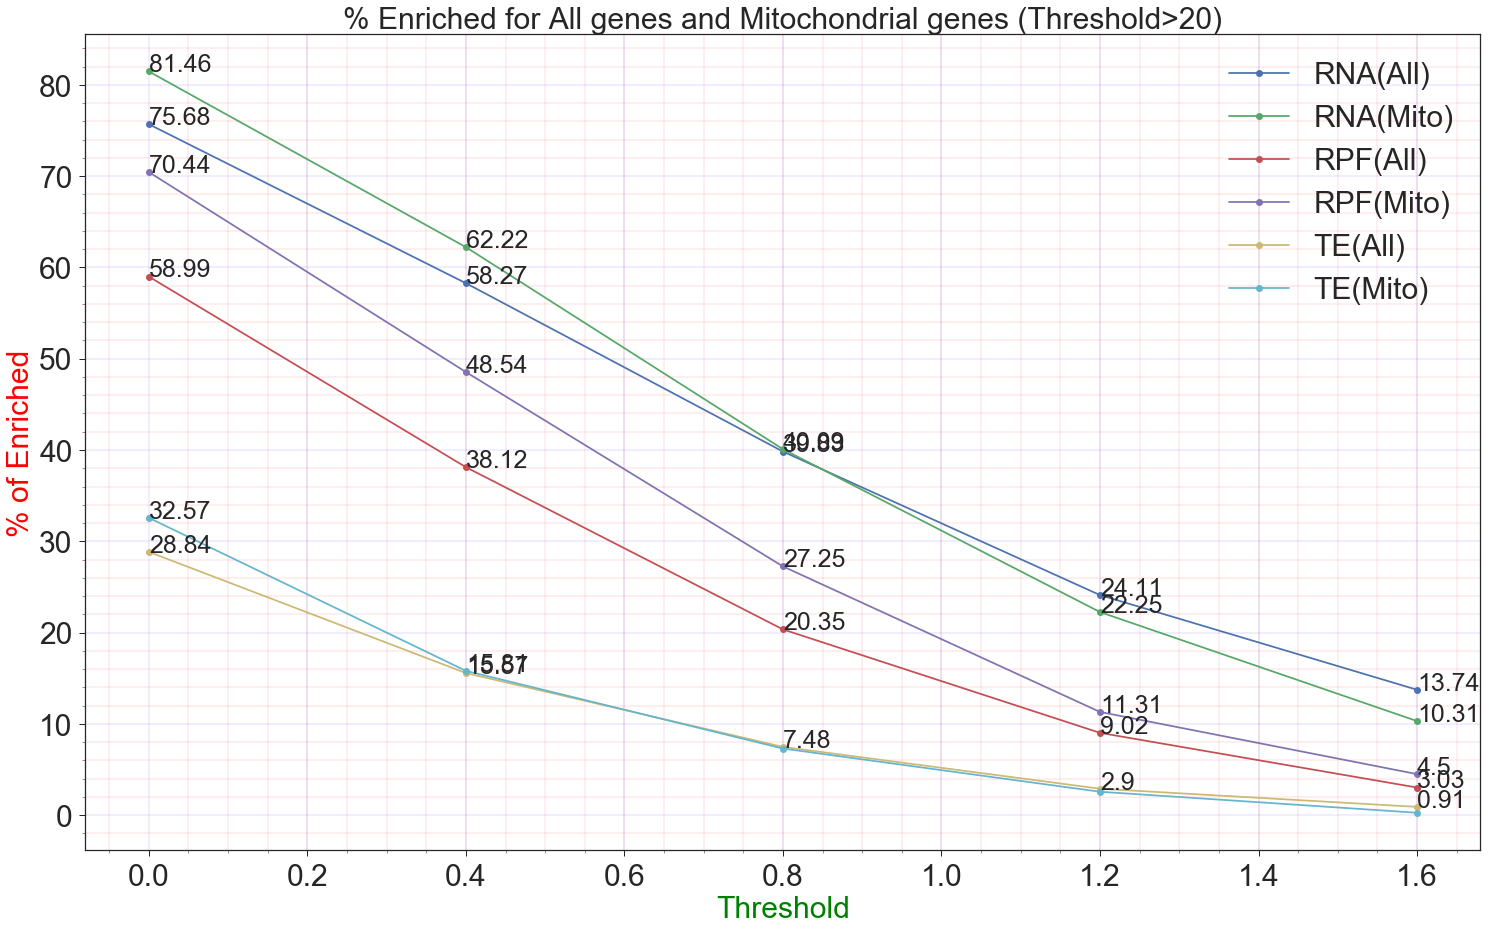

In [8]:
plt.xlabel('Threshold', fontsize=30, color='green')
plt.ylabel("% of Enriched", fontsize=30, color='red')

plt.plot(a, rna_all_20, label = 'RNA(All)', marker ='o')
for m,n in zip(a, rna_all_20): 
    plt.text(m, n, str(n), size = 25)
    
plt.plot(a, rna_mito_20, label = 'RNA(Mito)', marker = 'o')
for m,n in zip(a, rna_mito_20): 
    plt.text(m, n, str(n), size = 25)
    
plt.plot(a, rpf_all_20, label = 'RPF(All)',marker = 'o')
for m,n in zip(a, rpf_all_20): 
    plt.text(m, n, str(n), size = 25)
    
plt.plot(a, rpf_mito_20, label = 'RPF(Mito)',marker = 'o')
for m,n in zip(a, rpf_mito_20): 
    plt.text(m, n, str(n), size = 25)
    
plt.plot(a, te_all_20, label = 'TE(All)',marker = 'o')
for m,n in zip(a, te_all_20): 
    plt.text(m, n, str(n), size = 25)
    
plt.plot(a, te_mito_20, label = 'TE(Mito)',marker = 'o')
for m,n in zip(a[:2], te_mito_20[:2]): 
    plt.text(m, n, str(n), size = 25)

ax = plt.gca()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
#           ncol=6, fancybox=True, shadow=True, prop={'size':20})

plt.legend(loc='upper right', prop ={'size':30})
ax.grid(b=True, which='major', color='b', linewidth=0.13)
ax.grid(b=True, which='minor', color='r', linewidth=0.13)
ax.minorticks_on()
plt.title('% Enriched for All genes and Mitochondrial genes (Threshold>20)')


plt.show()

In [9]:
rna_all_30 = [77.11,59.26, 40.57, 24.18, 13.53]
rna_mito_30 = [82.75, 64.11, 41.06, 22.80, 10.83]

rpf_all_30 = [58.89, 37.03, 19.26, 8.36, 2.56]
rpf_mito_30 = [70.25, 48.10, 27.13, 10.75, 4.06]

te_all_30 = [28.21, 15.00, 7.10, 2.65, 0.83]
te_mito_30 = [31.84, 14.80, 6.84, 2.37, 0.28]

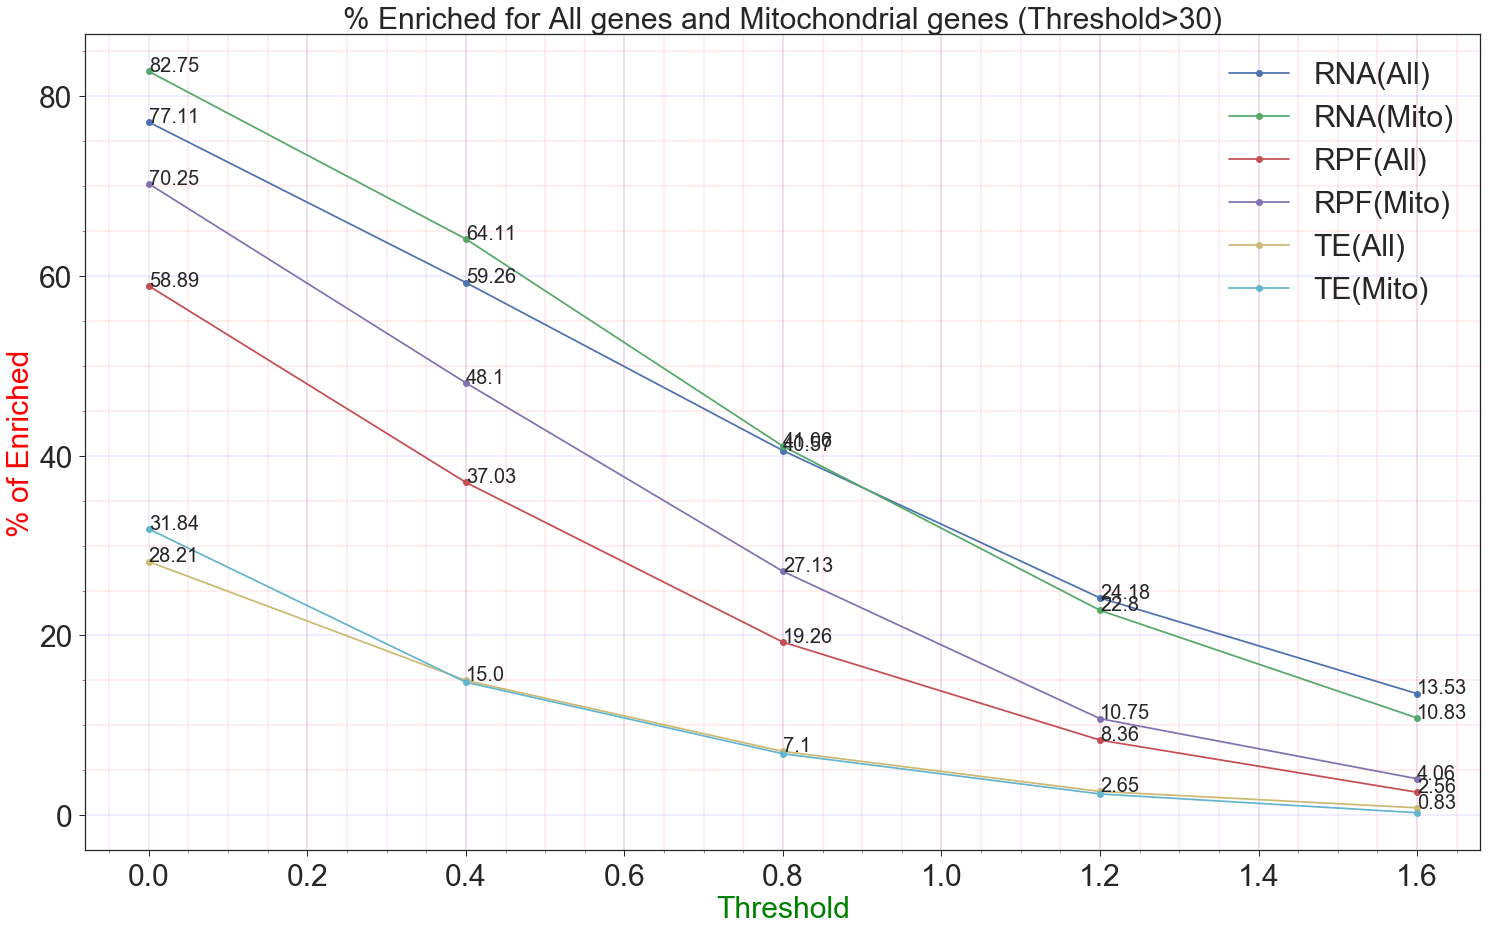

In [10]:
plt.xlabel('Threshold', fontsize=30, color='green')
plt.ylabel("% of Enriched", fontsize=30, color='red')

point_size = 20
plt.plot(a, rna_all_30, label = 'RNA(All)', marker ='o')
for m,n in zip(a, rna_all_30): 
    plt.text(m, n, str(n), size = point_size)

plt.plot(a, rna_mito_30, label = 'RNA(Mito)', marker = 'o')
for m,n in zip(a, rna_mito_30): 
    plt.text(m, n, str(n), size = point_size)
    
plt.plot(a, rpf_all_30, label = 'RPF(All)',marker = 'o')
for m,n in zip(a, rpf_all_30): 
    plt.text(m, n, str(n), size = point_size)
    
plt.plot(a, rpf_mito_30, label = 'RPF(Mito)',marker = 'o')
for m,n in zip(a, rpf_mito_30): 
    plt.text(m, n, str(n), size = point_size)

plt.plot(a, te_all_30, label = 'TE(All)',marker = 'o')
for m,n in zip(a, te_all_30): 
    plt.text(m, n, str(n), size = point_size)
    
plt.plot(a, te_mito_30, label = 'TE(Mito)',marker = 'o')
for m,n in zip(a[:1], te_mito_30[:1]): 
    plt.text(m, n, str(n), size = point_size)
    
ax = plt.gca()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
#           ncol=6, fancybox=True, shadow=True, prop={'size':20})
plt.legend(loc = 'upper right', prop={'size' : 30})
ax.grid(b=True, which='major', color='b', linewidth=0.13)
ax.grid(b=True, which='minor', color='r', linewidth=0.13)
ax.minorticks_on()
plt.title('% Enriched for All genes and Mitochondrial genes (Threshold>30)')

plt.show()

In [11]:
te_all_10_20 = [49.96,27.86,13.87,6.15,2.16]
te_mito_10_20 = [33.95, 17.40, 8.21, 3.43, 0.61]

te_all_20_10 = [48.13,27.74,14.58,6.79,2.76]
te_mito_20_10 = [33.53, 17.42, 8.53, 3.55, 1.07]

te_all_30_10 = [48.81,27.74,14.42,6.55,2.48]
te_mito_30_10 = [32.40, 15.76, 7.75, 2.92, 0.64]

te_all_10_30 = [51.10,27.98,13.53,5.56,1.83]
te_mito_10_30 = [33.42, 16.84, 7.76, 3.03, 0.39]

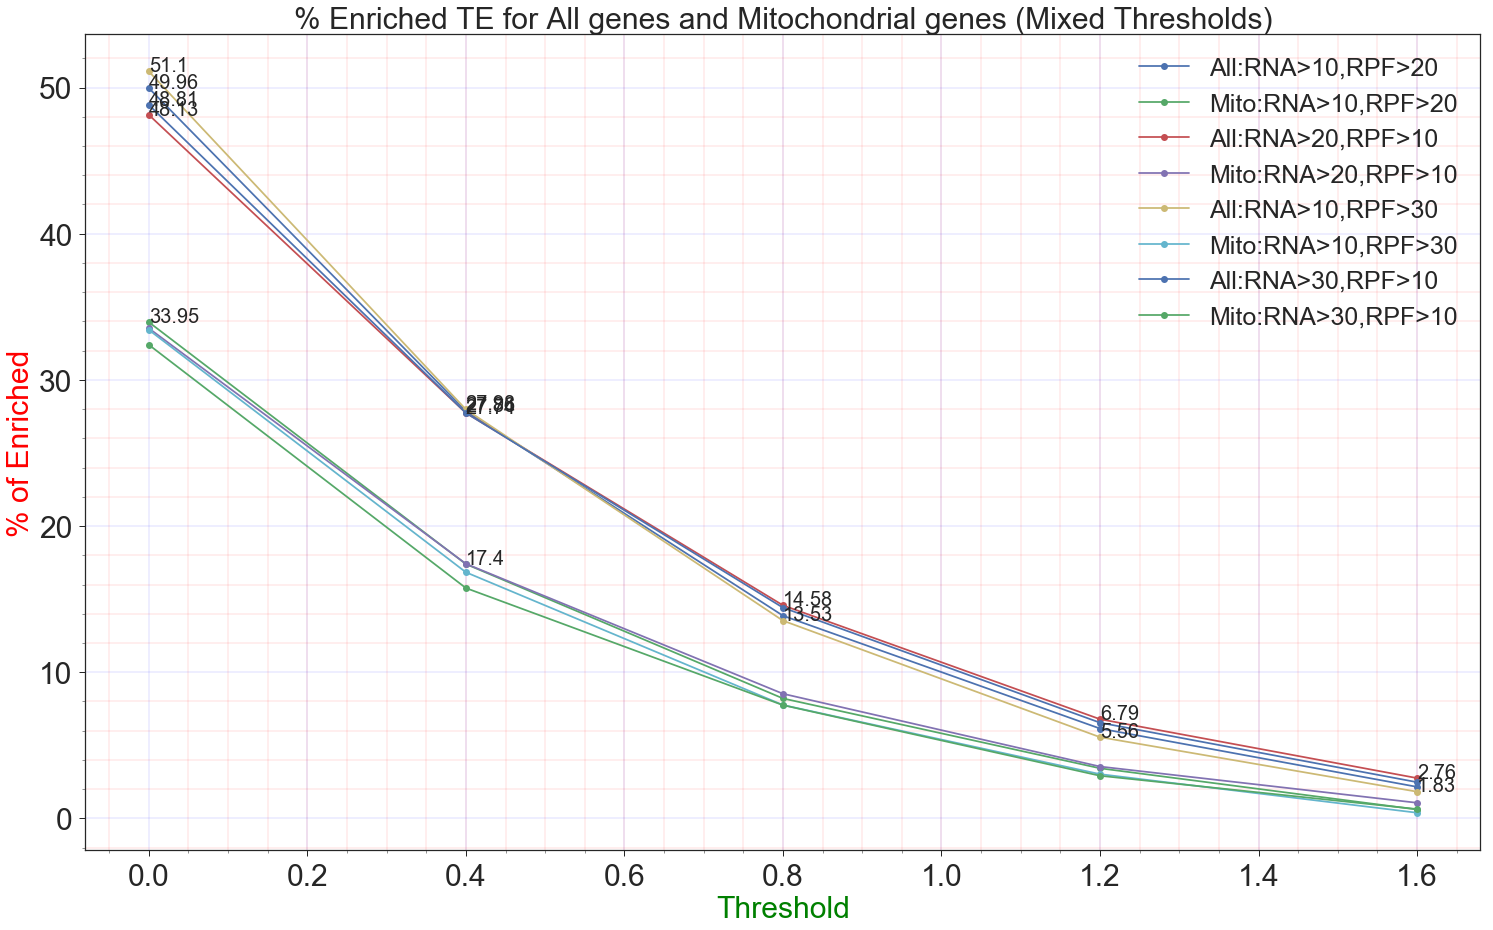

In [13]:
plt.xlabel('Threshold', fontsize=30, color='green')
plt.ylabel("% of Enriched", fontsize=30, color='red')

plt.plot(a, te_all_10_20, label = 'All:RNA>10,RPF>20', marker ='o')
for m,n in zip(a[:2], te_all_10_20[:2]): 
    plt.text(m, n, str(n), size = 20)

plt.plot(a, te_mito_10_20, label = 'Mito:RNA>10,RPF>20', marker ='o')
for m,n in zip(a[:2], te_mito_10_20[:2]): 
    plt.text(m, n, str(n), size = 20)

plt.plot(a, te_all_20_10, label = 'All:RNA>20,RPF>10', marker = 'o')
for m,n in zip(a, te_all_20_10):
    plt.text(m, n, str(n), size = 20)

plt.plot(a, te_mito_20_10, label = 'Mito:RNA>20,RPF>10', marker = 'o')
# for m,n in zip(a[:2], te_mito_20_10[:2]):
#     plt.text(m, n, str(n), size = 20)

plt.plot(a, te_all_10_30, label = 'All:RNA>10,RPF>30', marker = 'o')
for m,n in zip(a, te_all_10_30):
    plt.text(m, n, str(n), size = 20)

plt.plot(a, te_mito_10_30, label = 'Mito:RNA>10,RPF>30', marker = 'o')
# for m,n in zip(a[:2], te_mito_10_30[:2]):
#     plt.text(m, n, str(n), size = 20)

plt.plot(a, te_all_30_10, label = 'All:RNA>30,RPF>10', marker = 'o')
for m,n in zip(a[:1], te_all_30_10[:2]):
    plt.text(m, n, str(n), size = 20)
    
plt.plot(a, te_mito_30_10, label = 'Mito:RNA>30,RPF>10', marker = 'o')
# for m,n in zip(a[:1], te_mito_30_10[:2]):
#     plt.text(m, n, str(n), size = 20)

ax = plt.gca()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
#           ncol=6, fancybox=True, shadow=True, prop={'size':20})
plt.legend(loc = 'upper right', prop={'size' : 25})
ax.grid(b=True, which='major', color='b', linewidth=0.13)
ax.grid(b=True, which='minor', color='r', linewidth=0.13)
ax.minorticks_on()
plt.title('% Enriched TE for All genes and Mitochondrial genes (Mixed Thresholds)')

plt.show()

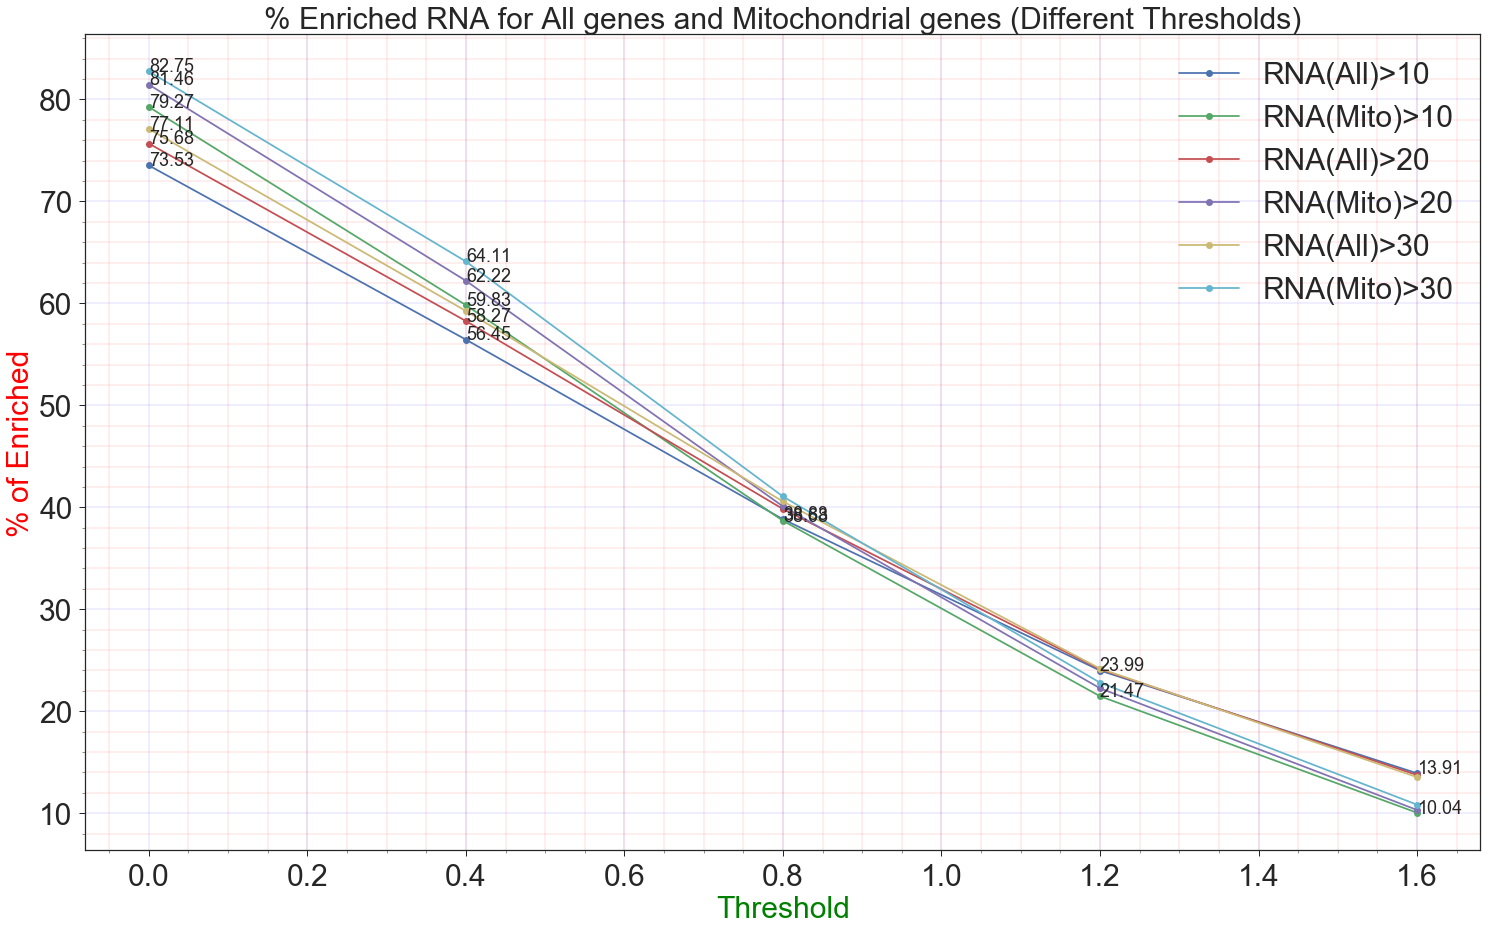

In [49]:
plt.xlabel('Threshold', fontsize=30, color='green')
plt.ylabel("% of Enriched", fontsize=30, color='red')

point_size = 18
plt.plot(a, rna_all_10, label = 'RNA(All)>10',marker = 'o')
for m,n in zip(a, rna_all_10): 
    plt.text(m, n, str(n), size = point_size)
    
plt.plot(a, rna_mito_10, label = 'RNA(Mito)>10',marker = 'o')
for m,n in zip(a, rna_mito_10): 
    plt.text(m, n, str(n), size = point_size)

plt.plot(a, rna_all_20, label = 'RNA(All)>20',marker = 'o')
for m,n in zip(a[:2], rna_all_20[:2]): 
    plt.text(m, n, str(n), size = point_size)
    
plt.plot(a, rna_mito_20, label = 'RNA(Mito)>20',marker = 'o')
for m,n in zip(a[:2], rna_mito_20[:2]): 
    plt.text(m, n, str(n), size = point_size)

plt.plot(a, rna_all_30, label = 'RNA(All)>30', marker ='o')
for m,n in zip(a[:1], rna_all_30[:1]): 
    plt.text(m, n, str(n), size = point_size)

plt.plot(a, rna_mito_30, label = 'RNA(Mito)>30', marker = 'o')
for m,n in zip(a[:2], rna_mito_30[:2]): 
    plt.text(m, n, str(n), size = point_size)
    
ax = plt.gca()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
#           ncol=6, fancybox=True, shadow=True, prop={'size':20})
plt.legend(loc = 'upper right', prop={'size' : 30})
ax.grid(b=True, which='major', color='b', linewidth=0.13)
ax.grid(b=True, which='minor', color='r', linewidth=0.13)
ax.minorticks_on()
plt.title('% Enriched RNA for All genes and Mitochondrial genes (Different Thresholds)')

plt.show()

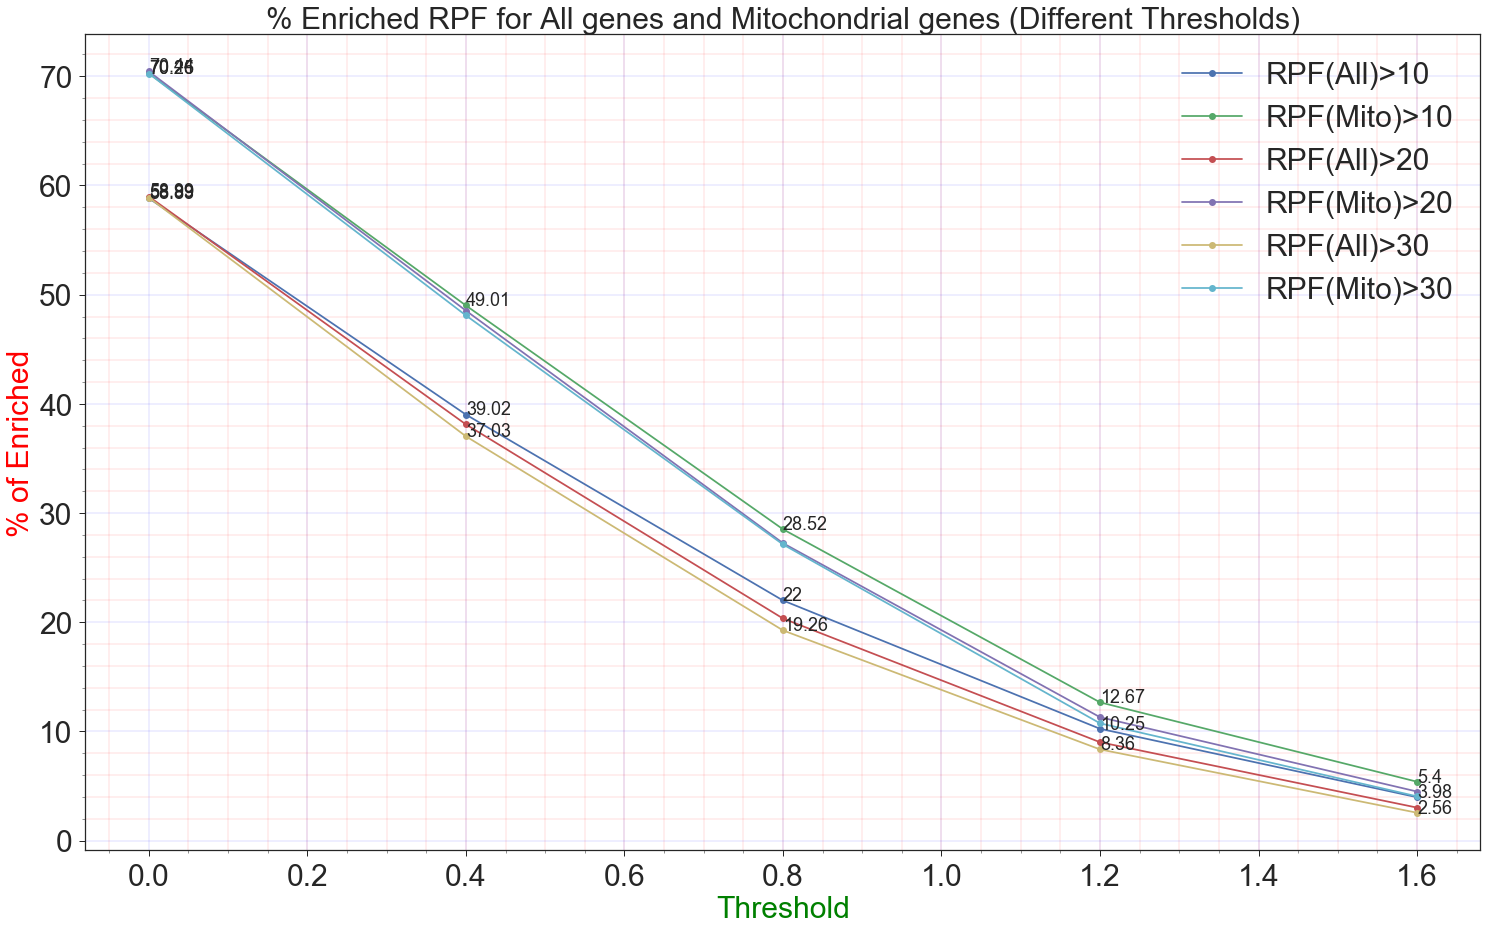

In [50]:
plt.xlabel('Threshold', fontsize=30, color='green')
plt.ylabel("% of Enriched", fontsize=30, color='red')

point_size = 18
plt.plot(a, rpf_all_10, label = 'RPF(All)>10',marker = 'o')
for m,n in zip(a, rpf_all_10): 
    plt.text(m, n, str(n), size = point_size)
    
plt.plot(a, rpf_mito_10, label = 'RPF(Mito)>10',marker = 'o')
for m,n in zip(a, rpf_mito_10): 
    plt.text(m, n, str(n), size = point_size)

plt.plot(a, rpf_all_20, label = 'RPF(All)>20',marker = 'o')
for m,n in zip(a[:1], rpf_all_20[:1]): 
    plt.text(m, n, str(n), size = point_size)
    
plt.plot(a, rpf_mito_20, label = 'RPF(Mito)>20',marker = 'o')
for m,n in zip(a[:1], rpf_mito_20[:1]): 
    plt.text(m, n, str(n), size = point_size)

plt.plot(a, rpf_all_30, label = 'RPF(All)>30', marker ='o')
for m,n in zip(a, rpf_all_30): 
    plt.text(m, n, str(n), size = point_size)

plt.plot(a, rpf_mito_30, label = 'RPF(Mito)>30', marker = 'o')
for m,n in zip(a[:1], rpf_mito_30[:1]): 
    plt.text(m, n, str(n), size = point_size)
    
ax = plt.gca()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
#           ncol=6, fancybox=True, shadow=True, prop={'size':20})
plt.legend(loc = 'upper right', prop={'size' : 30})
ax.grid(b=True, which='major', color='b', linewidth=0.13)
ax.grid(b=True, which='minor', color='r', linewidth=0.13)
ax.minorticks_on()
plt.title('% Enriched RPF for All genes and Mitochondrial genes (Different Thresholds)')

plt.show()

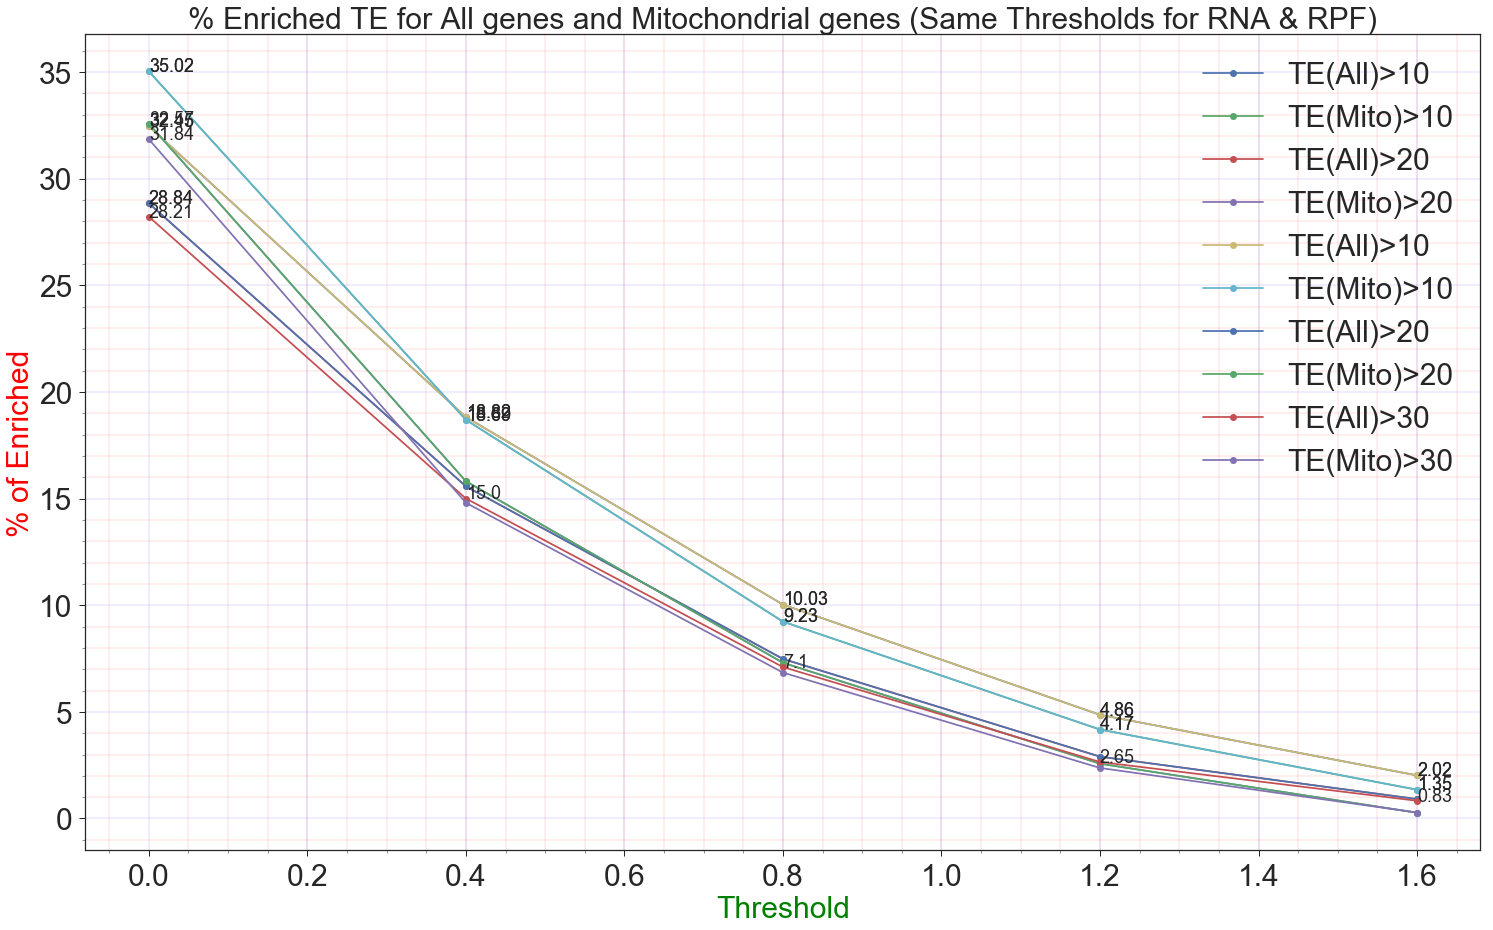

In [53]:
plt.xlabel('Threshold', fontsize=30, color='green')
plt.ylabel("% of Enriched", fontsize=30, color='red')

point_size = 18
plt.plot(a, te_all_10, label = 'TE(All)>10',marker = 'o')
for m,n in zip(a, te_all_10): 
    plt.text(m, n, str(n), size = point_size)
    
plt.plot(a, te_mito_10, label = 'TE(Mito)>10',marker = 'o')
for m,n in zip(a, te_mito_10): 
    plt.text(m, n, str(n), size = point_size)

plt.plot(a, te_all_20, label = 'TE(All)>20',marker = 'o')
for m,n in zip(a[:1], te_all_20[:1]): 
    plt.text(m, n, str(n), size = point_size)
    
plt.plot(a, te_mito_20, label = 'TE(Mito)>20',marker = 'o')
for m,n in zip(a[:1], te_mito_20[:1]): 
    plt.text(m, n, str(n), size = point_size)

plt.plot(a, te_all_30, label = 'TE(All)>30', marker ='o')
for m,n in zip(a, te_all_30): 
    plt.text(m, n, str(n), size = point_size)

plt.plot(a, te_mito_30, label = 'TE(Mito)>30', marker = 'o')
for m,n in zip(a[:1], te_mito_30[:1]): 
    plt.text(m, n, str(n), size = point_size)
    
ax = plt.gca()
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
#           ncol=6, fancybox=True, shadow=True, prop={'size':20})
plt.legend(loc = 'upper right', prop={'size' : 30})
ax.grid(b=True, which='major', color='b', linewidth=0.13)
ax.grid(b=True, which='minor', color='r', linewidth=0.13)
ax.minorticks_on()
plt.title('% Enriched TE for All genes and Mitochondrial genes (Same Thresholds for RNA & RPF)')

plt.show()

In [ ]:
te_mi